In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
import csv
import time

#폰트 지정
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False
from tqdm import tqdm_notebook
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv
from selenium import webdriver
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [103]:
# 원본 데이터 파일 
data = pd.read_csv('netflix_titles.csv',encoding='utf-8')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


## 1. 데이터 크롤링

In [31]:
# 크롬드라이버
driver = webdriver.Chrome("C:/p/chromedriver")
driver.get("https://www.imdb.com/")

In [32]:
# 제목에 붙은 폭 없는 공백문자 (\u200b) 삭제
title_c = list(np.array(data["title"].tolist()))
h=[]
for i in range(0, len(title_c)):
    if "\u200b" in title_c[i]:
        title_c[i] = title_c[i].replace("\u200b",'')
        h.append(title_c[i])
title_c

['3%',
 '7:19',
 '23:59',
 '9',
 '21',
 '46',
 '122',
 '187',
 '706',
 '1920',
 '1922',
 '1983',
 '1994',
 '2,215',
 '3022',
 'Oct-01',
 'Feb-09',
 '22-Jul',
 '15-Aug',
 "'89",
 'Kuch Bheege Alfaaz',
 'Goli Soda 2',
 'Maj Rati Keteki',
 'Mayurakshi',
 'SAINT SEIYA: Knights of the Zodiac',
 '(T)ERROR',
 '(Un)Well',
 '#Alive',
 '#AnneFrank - Parallel Stories',
 '#blackAF',
 '#cats_the_mewvie',
 '#FriendButMarried',
 '#FriendButMarried 2',
 '#realityhigh',
 '#Roxy',
 '#Rucker50',
 '#Selfie',
 '#Selfie 69',
 'แผนร้ายนายเจ้าเล่ห์',
 '¡Ay, mi madre!',
 'Çarsi Pazar',
 'Ég man þig',
 'Çok Filim Hareketler Bunlar',
 'Òlòtūré',
 'Æon Flux',
 'Şubat',
 '1 Chance 2 Dance',
 '1 Mile to You',
 '10 Days in Sun City',
 '10 jours en or',
 '10,000 B.C.',
 '100 Days My Prince',
 '100 Days Of Solitude',
 '100 Humans',
 '100 Meters',
 '100 Things to do Before High School',
 "100 Years: One Woman's Fight for Justice",
 '100% Halal',
 '100% Hotter',
 '1000 Rupee Note',
 '12 ROUND GUN',
 '12 Years Promise',


In [33]:
html=[]

In [34]:
# 평점조회  URL를 들어가기 위해 필요한 제목의 고유번호를 얻기 위한 작업 
# 제목을 검색한 주소를 가져온다.
html=[]
for i in tqdm_notebook(range(0, len(title_c))):
    element = driver.find_element_by_name('q')
    element.send_keys(title_c[i])
    element.submit()
    juso = driver.current_url
    html.append(juso)

KeyboardInterrupt: 

In [ ]:
# 응답을 받지 못하여 주소가 제대로 입력되지 않은 것들 처리 
for i in range(0, len(html)):
    if "https://www.imdb.com/find?q=&ref_=nv_sr_sm" in html[i]:
        print(title_c[i])

In [ ]:
html[3] = "https://www.imdb.com/find?q=9&ref_=nv_sr_sm"
html[11] = "https://www.imdb.com/find?q=1983&ref_=nv_sr_sm"
html[799] = "https://www.imdb.com/find?q=Becoming&ref_=nv_sr_sm"
html[1244] = "https://www.imdb.com/find?q=Catching+the+Sun&ref_=nv_sr_sm"
html[1480] = "https://www.imdb.com/find?q=Concrete+Football&ref_=nv_sr_sm"
html[1540] = "https://www.imdb.com/find?q=Criminal%3A+Spain&ref_=nv_sr_sm"
html[2731] = "https://www.imdb.com/find?q=High+Score&ref_=nv_sr_sm"
html[5692] = "https://www.imdb.com/find?q=Sofia+the+First&ref_=nv_sr_sm"
html[6187] = "https://www.imdb.com/find?q=The+Burial+of+Kojo&ref_=nv_sr_sm"

In [ ]:
# 영화 고유번호 크롤링
a = []
for i in tqdm_notebook(range(0,len(html))):
    try : 
        url = html[i]
        page = urlopen(url)
        soup = BeautifulSoup(page, "html.parser")        
        title= list(soup.find_all("td", class_="result_text")[0])
        title1 = str(title[1]).split("/")
        title2 = title1[2]
        a.append(title2)
    except IndexError: 
        a.append(" ")

len(a)

In [ ]:
# 사람이름으로 검색된 것들 영화제목으로 수정

for i in tqdm_notebook(range(0, len(s_a))):
    try :
        url = s_a[i]
        page = urlopen(url)
        soup = BeautifulSoup(page, "html.parser")        
        titles_a= list(soup.find_all("td", class_="result_text"))
        title1s_a = str(titles_a).split("/")
        for j in range(0, len(title1s_a)): 
            if """<td class="result_text">""" in title1s_a[j-2] and "title" in title1s_a[j-1]: 
                a[i] = title1s_a[j]
                break

    except ValueError:
        pass

In [ ]:
for i in range(0, len(a)):
    if "tt" not in a[i] and " " not in a[i]:
        a[i] = " "

In [ ]:
# 다시 수정한 고유번호 저장 
with open('title_change.csv', 'r', encoding='utf=8') as f:
    rdr = csv.reader(f)
    for i, line in enumerate(rdr):
        if i==0:
            a = line

In [ ]:
All_star=[]
def append_0(a):
    All_star.append(a)

In [ ]:
# 평점 조회
for i in tqdm_notebook(range(0, len(a))):
#for i in tqdm_notebook(range(0, 20)):
    if a[i] == " ":
        append_0(0)
        continue
    try : 
        url = "https://www.imdb.com/title/{}/ratings?ref_=tt_ov_rt".format(a[i])
        page = urlopen(url)
        soup = BeautifulSoup(page, "html.parser")
        star = list([soup.find_all("td", "ratingTable")[n].get_text() for n in range(0, 18)])
        for j in range(0, len(star)):
            star[j] = star[j].replace('\n', '').split()
            if  "-" in star[j]:
                star[j] = 0, 0
        star = np.array(star).flatten().tolist()
        All_star.append(star[0])
    except (IndexError):
        append_0(0)

In [ ]:
data["All_star"] = All_star

In [ ]:
# duration 에서 Season으로 있는것을 1화당 평균 분으로 교체하기 위해 Seasons인 title 찾기
season=[]
for i in range(0, len(data3["duration"])):
    if "Seasons" in data3["duration"][i] or "Season" in data3["duration"][i]:
        season.append(data3["title"][i])
    elif "min" in data3["duration"][i]:
        season.append("")
    else :
        season.append("")
season

In [ ]:
time_min =[]

In [ ]:
# 위에서 구한 고유번호를 통해 1화당 평균 시간 크롤링 

for i in tqdm_notebook(range(0, len(season))):
    if a[i] == " ":
        time_min.append("주소가 없습니다.")
        continue
    try :
        if season[i] != "":
            url = "https://www.imdb.com/title/{}/?ref_=fn_al_tt_1".format(a[i])
            page = urlopen(url)
            soup = BeautifulSoup(page, "html.parser")
            time = soup.find("div", "subtext")
            time_str = str(time)
            time_list = list(time)
            time_split = str(time_list).split(">")
            time_split = str(time_list).replace('\n', '').split()
            if "datetime" in time_str :
                for j in range(0, len(time_split)):
                    if "datetime" in time_split[j-1] and "min" not in time_split[j+1]:
                        time_min.append(time_split[j])
                    elif "datetime" in time_split[j-1] and "min" in time_split[j+1] :
                        time_min.append(time_split[j]+time_split[j+1])
            elif "datetime" not in time_str:
                time_min.append("없음")
                
        else:
            time_min.append("")
    except IndexError:
        time_min.append(data["title"][i])

time_min


In [ ]:
# 주소를 찾지 못해 시간을 구하지 못한 것 체크
title_notime = []
title_nottime=[]
cnt=0
for i in range(0, len(time_min)):
    if time_min[i] == "주소가 없습니다.":
        cnt +=1
        title_notime.append([i])
        title_nottime.append(data["title"][i])
print(title_notime)
title_nottime


In [ ]:
# 주소가 없는것, datetime을 찾지 못한 것은 따로 구하여 입력
for i in range(0, len(time_min)):
    if time_min[i] == "주소가 없습니다.":
        time_min[i] = ""
time_min

In [ ]:
# 데이터 duration 교체
for i in range(0, len(data3["duration"])):
    if time_min[i] != "":
        data3["duration"][i] = time_min[i]
data3

In [ ]:
# 모두 분단위로 교체 

for i in range(0, len(data3["duration"])):
    if "h" in data3["duration"][i]:
        if "min" in data3["duration"][i]:
            k = data3["duration"][i]
            x = k.split("h")
            y = x[1].split("min")
            z = (int(x[0])*60) + int(y[0])
            data3["duration"][i] = str(z)+"min"
        elif "min" not in data3["duration"][i]:
            k = data3["duration"][i]
            x = k.split("h")
            z = (int(x[0])*60)
            data3["duration"][i] = str(z)+"min"
            

In [111]:
data = pd.read_csv('data_star_duration.csv',encoding='utf-8')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,All_star
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,49min,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,7.4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,5.9
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",7.1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,6.6
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,6.1
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",0.0
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,52min,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,6.9


## 2. 데이터 전처리

In [112]:
# Movie면 0으로 TV Show면 1로 변경

for i in range(0, len(data["type"])):
    if data["type"][i] == "Movie":  
        data["type"][i] = 0
    elif data["type"][i] == "TV Show":
        data["type"][i]= 1

In [113]:
def rating(x):
    if x=="TV-MA" or x=="R" or x=="NC-17": 
        return 0 # 18세 미만 관람불가
    elif x=='TV-14' or x=='PG-13':
        return 1 # 14세 미만 관람불가
    elif x=='TV-PG' or x=='TV-G' or x=="PG":
        return 2 # 어린이 시청시 보호자 지도
    elif x=='TV-Y7-FV' or x=='TV-Y7':
        return 3 # 7세 미만 관람불가
    elif x=="TV-Y":
        return 4 # 영유아 프로그램
    elif x=="NR" or x=="UR":
        return 5 # 등급 받지 않음
    else:
        return 6 # 전체 관람

data["rating"]=data["rating"].apply(rating)
data["rating"].unique()
data["rating"].value_counts()

0    3531
1    2317
2    1247
4     280
3     277
5      89
6      46
Name: rating, dtype: int64

In [114]:
# duration "min" 제거
data["duration"]= data["duration"].str.replace("min", "")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,All_star
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,0,49,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,7.4
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,0,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,5.9
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,0,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,1,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",7.1
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,1,123,Dramas,A brilliant group of students become card-coun...,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,0,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,0,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,6.6
7783,s7784,0,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,1,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,6.1
7784,s7785,0,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,0,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",0.0
7785,s7786,1,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,2,52,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,6.9


In [115]:
# 총평점 6.5점이하는 0으로 나머지는 1로
for i in range(0, len(data["All_star"])):
    if data["All_star"][i] <= 6.5:
        data["All_star"][i] = 0
    elif data["All_star"][i] > 6.5:
        data["All_star"][i] = 1
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,All_star
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,0,49,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1.0
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,0,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0.0
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,0,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0.0
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,1,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1.0
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,1,123,Dramas,A brilliant group of students become card-coun...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,0,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,0,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,1.0
7783,s7784,0,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,1,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,0.0
7784,s7785,0,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,0,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",0.0
7785,s7786,1,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,2,52,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,1.0


In [116]:
data = data.astype({"All_star":"int"})

In [117]:
all_genres =[]
for x in data.listed_in:
    all_genres.extend(x.split(', '))
all_genres

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 '

In [118]:
for i in range(0, len(all_genres)):   
     if all_genres[i][0] == " " :
        all_genres[i] = all_genres[i][1:]
all_genres

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 '

In [119]:
# 중복 제거
genres = pd.unique(all_genres)
print(len(genres))
genres

42


array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [120]:
# 제로 메트릭스 생성
zero_matrix = np.zeros((len(data), len(genres)))
print(zero_matrix.shape)
zero_matrix

(7787, 42)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
# 더미 생성
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies

,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,International Movies,Horror Movies,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,TV Mysteries,...,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# 리스트 검색을 위한 설정
dummies.columns.get_indexer(genre.split(','))

array([13, -1], dtype=int64)

In [123]:
for i, genre in enumerate(data.listed_in):
    indices = dummies.columns.get_indexer(genre.split(','))
    dummies.iloc[i, indices] = 1
    
dummies = dummies.astype("int")
dummies

,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,International Movies,Horror Movies,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,TV Mysteries,...,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7783,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7785,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [124]:
# row data에 병합
data_joined = data.join(dummies.add_prefix(''))
data_joined

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,0,49,...,0,0,0,0,0,0,0,0,0,1
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,0,93,...,0,0,0,0,0,0,0,0,0,1
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,0,78,...,0,0,0,0,0,0,0,0,0,1
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,1,80,...,0,0,0,0,0,0,0,0,0,1
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,1,123,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,0,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,0,99,...,0,0,0,0,0,0,0,0,0,1
7783,s7784,0,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,1,111,...,0,0,0,0,0,0,0,0,0,1
7784,s7785,0,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,0,44,...,0,0,0,0,0,0,0,0,0,1
7785,s7786,1,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,2,52,...,0,0,0,0,0,0,0,0,0,1


In [125]:
data = data_joined

In [131]:
data = data.drop(["show_id", "director", "cast", "date_added", "description", "title", "listed_in"], axis=1)

In [127]:
#  data1 : 나라이름이 누락되어있는 것을 수작업으로 찾아 넣은 파일 
data1 = pd.read_csv("C:/finalProject/country_final1.csv")

In [128]:
data["country"] = data1["country"]

In [129]:
# 0 : United States 
# 1 : India
# 2 : United Kingdom
# 3 : Japan 
# 4 : South Korea
# 5 : Canada
# 6 : Spain 
# 7 : France 
# 8 : 공동 제작
# 9 : 상위8개 국가를 제외한 나머지 국가

country2 = dict(data["country"].value_counts())
country_item = list(country2.items())

for i in range(0, len(data["country"])):
    if "," in str(data["country"][i]):
        data["country"][i] = 8  # 공동제작
        continue
    for j in range(0, 7):
        if data["country"][i] == country_item[j][0]:
            data["country"][i] = j
            break
    else :
        data["country"][i] = 9 # 상위 8개국가를 제외한 나머지 국가
        



In [132]:
data.to_csv("netflix_data_66.csv", index=False)

,type,country,release_year,rating,duration,All_star,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,...,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV
0,1,9,2020,0,49,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,9,2016,0,93,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,9,2011,0,78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2009,1,80,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2008,1,123,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,8,2005,0,99,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7783,0,1,2015,1,111,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7784,0,9,2019,0,44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7785,1,9,2019,2,52,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 3. 시각화

In [76]:
data.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
All_star        7787
dtype: int64

In [77]:
# TV
netflix_shows=data[data['type']=='TV Show']

In [78]:
# 영화
netflix_movies=data[data['type']=='Movie']

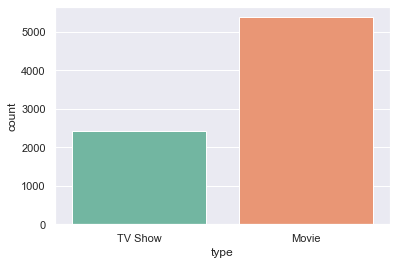

In [79]:
# TV vs 영화
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=data, palette="Set2")

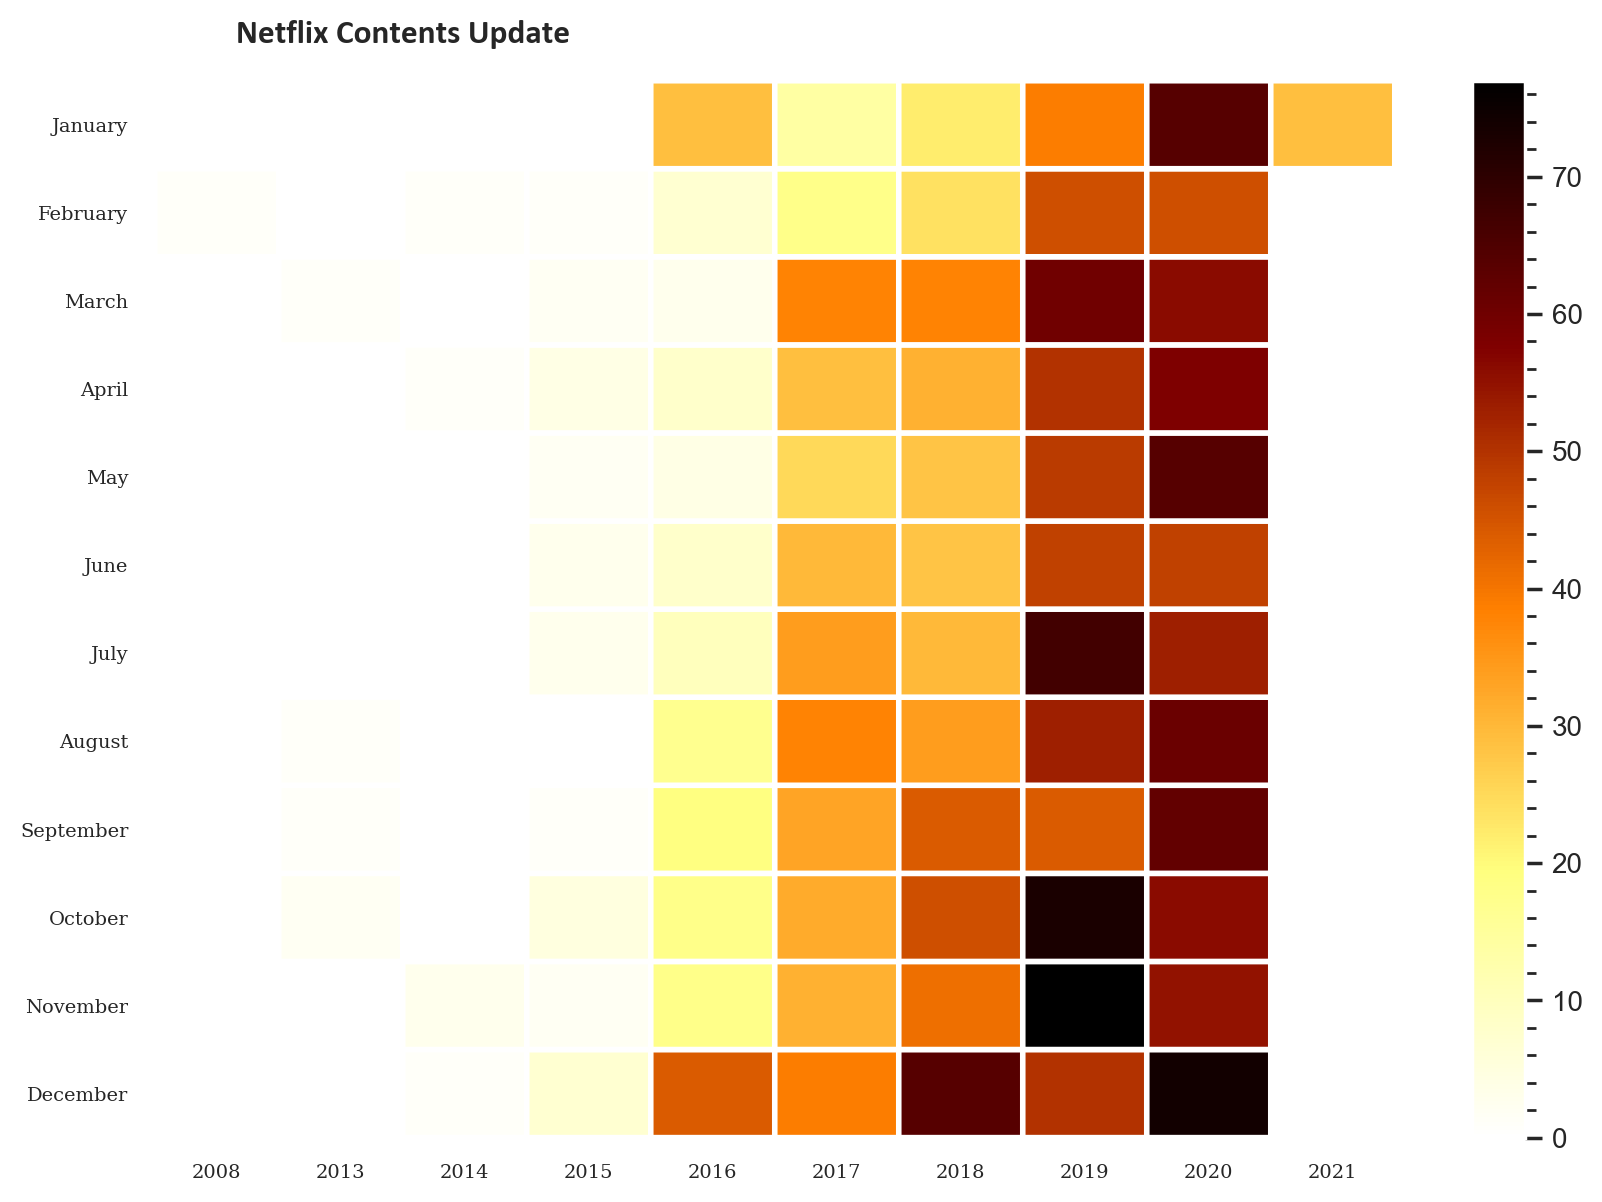

In [80]:
# 월별 컨텐츠 업데이트 비율

netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)

plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=10) 
cbar.ax.minorticks_on()
plt.show()

In [81]:
print(netflix_shows['rating'])

0       TV-MA
5       TV-MA
11      TV-MA
12      TV-MA
16      TV-14
        ...  
7767    TV-PG
7775    TV-Y7
7777    TV-Y7
7779    TV-MA
7785    TV-PG
Name: rating, Length: 2410, dtype: object


### 영화등급표
![%EC%98%81%ED%99%94%EB%93%B1%EA%B8%89.PNG](attachment:%EC%98%81%ED%99%94%EB%93%B1%EA%B8%89.PNG)
###### 출처:https://en.wikipedia.org/wiki/Television_content_rating_system

### 프로그램 등급별 제작수

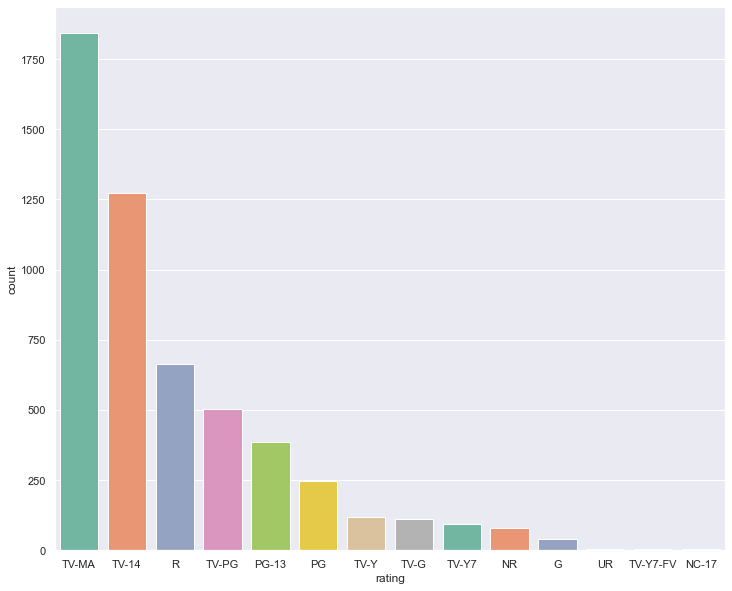

In [82]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:16])

In [96]:
ratings = pd.DataFrame({'Title':data.title,
                    'Release Year':data.release_year,
                    'Rating': data.All_star,
                    'Genre':data.listed_in})

In [97]:
ratings.dropna()
joint_data=ratings.merge(data,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [98]:
import plotly.express as px

top_rated=joint_data[:20]
fig =px.sunburst(top_rated, path=['title','country'], values='Rating', color='Rating')
fig.show()

In [99]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)

topcountries=country_count[0:11]
topcountries

,country
United States,2687
India,996
United Kingdom,430
Japan,245
South Korea,205
Canada,182
Spain,142
France,125
Egypt,118
Mexico,108


In [100]:
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

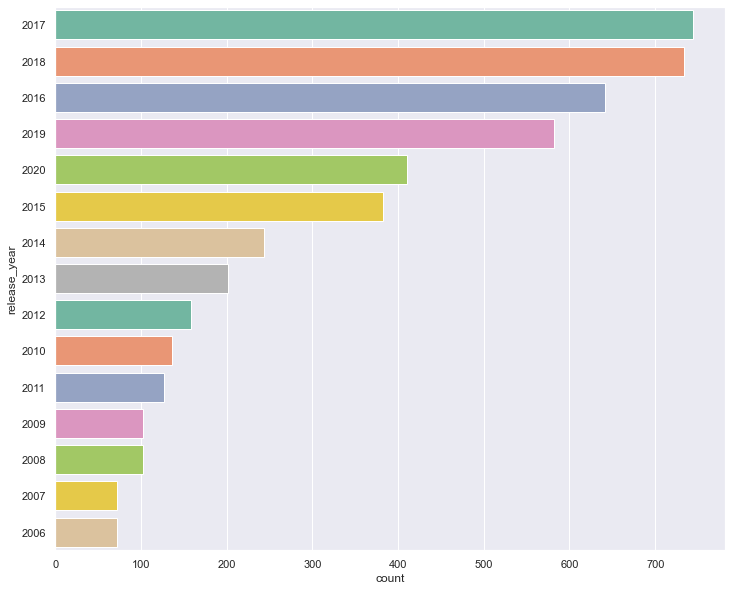

In [101]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", 
                   order=netflix_movies['release_year'].value_counts().index[0:15])

## 4. ML

### 4-1. KNN

In [3]:
data = pd.read_csv("netflix_data_66.csv")
data

,type,country,release_year,rating,duration,All_star,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,Dramas,...,TV Shows,Classic Movies,Cult Movies,TV Horror,Stand-Up Comedy & Talk Shows,Teen TV Shows,Stand-Up Comedy,Anime Features,TV Thrillers,Classic & Cult TV
0,1,9,2020,0,49,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,9,2016,0,93,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,9,2011,0,78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2009,1,80,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2008,1,123,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,8,2005,0,99,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7783,0,1,2015,1,111,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7784,0,9,2019,0,44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7785,1,9,2019,2,52,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.drop(["All_star"], axis =1)
y = data["All_star"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size=0.3)

In [6]:
# 특성별 최소값
min_on_training = X_train.min(axis=0)
#print(min_on_training)

# 특성별 최대값
max_on_training = X_train.max(axis=0)
#print(max_on_training)

# 특성별 범위(최대-최소)
range_on_training = (X_train - min_on_training).max(axis=0)
#range_on_training = (X_train - min_on_training)

X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

In [7]:
# 임의의 파라미터로 테스트
KNN_clf = KNeighborsClassifier(n_neighbors=20, p=1).fit(X_train, y_train)
KNN_clf.score(X_train, y_train)

0.6928440366972477

In [8]:
KNN_clf.score(X_test, y_test)

0.636285836542576

In [8]:
train_acc=[]  # 훈련한 결과의 정확도
test_acc=[]  # 테스트 결과의 정확도 
for n_neigh in range(1, 100):
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X_train, y_train)
    train_acc.append(clf.score(X_train,y_train))
    test_acc.append(clf.score(X_test, y_test))

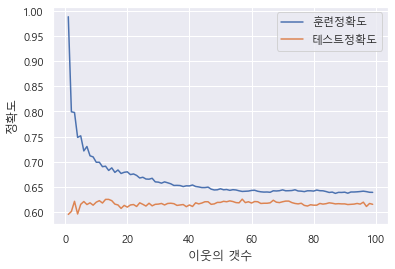

In [220]:
plt.plot(range(1, 100), train_acc, label="훈련정확도")
plt.plot(range(1, 100), test_acc, label="테스트정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 갯수")
plt.legend()

In [221]:
# KNN의 이웃의 갯수와 거리의 최적의 하이퍼 파라미터를 구하기 위한 그리드 서치 
params = {'n_neighbors':[x for x in range(1, 100)], 
          'p':[p for p in range(1, 2)]
         }


KNN_clf2 = KNeighborsClassifier()
grid_cv = GridSearchCV(KNN_clf2, param_grid = params, cv= 10)

grid_cv.fit(X, y)

print(" 최적의 하이퍼 파라미터\n", grid_cv.best_params_)
print(" 최고 예측 정확도 :", grid_cv.best_score_)

 최적의 하이퍼 파라미터
 {'n_neighbors': 17, 'p': 1}
 최고 예측 정확도 : 0.6572481033293622


In [9]:
# 최적의 하이퍼 파라미터를 적용
KNN_clf = KNeighborsClassifier(n_neighbors=17, p=1).fit(X_train, y_train)
KNN_clf.score(X_train, y_train)

0.7018348623853211

In [10]:
KNN_clf.score(X_test, y_test)

0.6422764227642277

In [11]:
col_names=["type", "country", "release_year" ,"rating", "duration", "All_star"]
xy =[]
ab = []
data2_target_title = data.groupby(by = "All_star")
for i in range(5):
    for j in range(i+1, 5):
        xy.append((col_names[i],col_names[j]))
print(xy)

[('type', 'country'), ('type', 'release_year'), ('type', 'rating'), ('type', 'duration'), ('country', 'release_year'), ('country', 'rating'), ('country', 'duration'), ('release_year', 'rating'), ('release_year', 'duration'), ('rating', 'duration')]


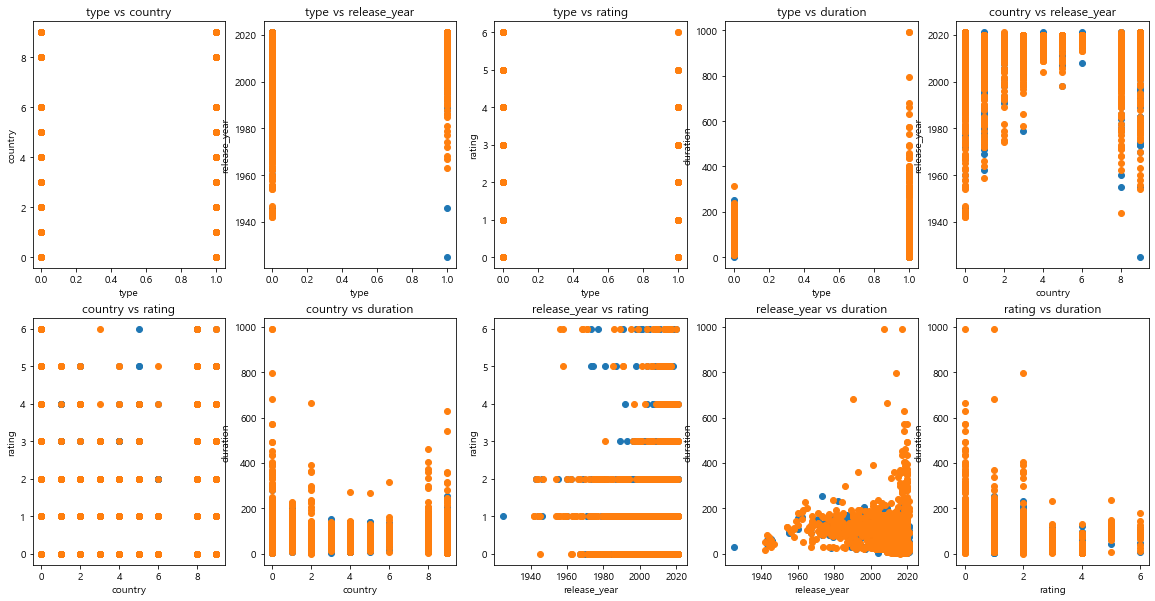

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
xy_idx=0
for row in range(2):
    for col in range(5):
        axis= ax[row, col]
        x = xy[xy_idx][0]
        y = xy[xy_idx][1]
        xy_idx +=1 
        axis.set_title("{} vs {}".format(x, y))
        axis.set_xlabel(x)
        axis.set_ylabel(y)
        for name, group in data2_target_title:
            axis.scatter(group[x], group[y], label= name)

In [13]:
pred=KNN_clf.predict(X_test)
print("정확도", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도 0.6422764227642277
              precision    recall  f1-score   support

           0       0.66      0.59      0.62      1168
           1       0.63      0.69      0.66      1169

    accuracy                           0.64      2337
   macro avg       0.64      0.64      0.64      2337
weighted avg       0.64      0.64      0.64      2337



In [14]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred})
df

,Real Values,Predicted Values
3559,1,1
5164,1,1
2667,0,0
4656,0,1
6701,0,1
...,...,...
5684,1,1
3844,1,1
7042,1,1
2224,1,0


In [15]:
print("f1_score : ", f1_score(y_test,pred))
print("precision_score : ",precision_score(y_test, pred))
print("recall_screo : ", recall_score(y_test, pred))

f1_score :  0.6590538336052202
precision_score :  0.6297739672642245
recall_screo :  0.6911890504704876


### 4-2. SVM

In [ ]:
svm50 = SVC(C=50).fit(X_train_scaled, y_train)

In [16]:
print('훈련 결과 : ', svm50.score(X_train_scaled, y_train))
print('테스트 결과 : ', svm50.score(X_test_scaled, y_test))

In [17]:

params = [{'kernel':['rbf'], 'gamma':[0.00001, 0.0001, 0.001, 0.1, 1],
         'C':[0.01,0.1,1,10,100,1000]}]

gs_svm = GridSearchCV(SVC(), params, cv=10).fit(X_train_scaled, y_train)

In [ ]:
print(gs_svm.best_params_)

In [ ]:
svm_clf = SVC(C=1000, gamma=0.1).fit(X_train_scaled, y_train)
print('훈련 결과 : ', svm_clf.score(X_train_scaled, y_train))
print('테스트 결과 : ', svm_clf.score(X_test_scaled, y_test))

In [ ]:
pred = svm_clf.predict(X_test_scaled)

In [ ]:
print('정확도 : ', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=['class 0', 'class 1']))

In [ ]:
nf_compare = pd.DataFrame({'prediction':pred, 'truth':y_test})
nf_compare.head(10)

### 4-3. LogisticRegression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
# 패널티 비교 및 알파값(C값) 찾기 찾기
penalty_L1 = []
penalty_L2 = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]:
    log_clf= LogisticRegression(C=i, penalty="l2",max_iter=100000000000).fit(X_train_scaled, y_train)
    a = (["Penalty : %0.4f,   훈련 점수 : %0.3f,   테스트 점수 : %0.3f"
         %(i, log_clf.score(X_train_scaled, y_train), log_clf.score(X_test_scaled, y_test))])
    penalty_L2.append(a)
    log_clf2= LogisticRegression(C=i, penalty="l1",max_iter=100,
                             solver="liblinear").fit(X_train_scaled, y_train)
    b = (["Penalty : %0.2f,   훈련 점수 : %0.3f,   테스트 점수 : %0.3f"
         %(i, log_clf.score(X_train_scaled, y_train), log_clf.score(X_test_scaled, y_test))])
    penalty_L1.append(b)
penalty_L2, penalty_L1

([['Penalty : 0.0000,   훈련 점수 : 0.516,   테스트 점수 : 0.517'],
  ['Penalty : 0.0000,   훈련 점수 : 0.516,   테스트 점수 : 0.517'],
  ['Penalty : 0.0001,   훈련 점수 : 0.516,   테스트 점수 : 0.517'],
  ['Penalty : 0.0010,   훈련 점수 : 0.640,   테스트 점수 : 0.659'],
  ['Penalty : 0.0100,   훈련 점수 : 0.656,   테스트 점수 : 0.668'],
  ['Penalty : 0.1000,   훈련 점수 : 0.668,   테스트 점수 : 0.683']],
 [['Penalty : 0.00,   훈련 점수 : 0.516,   테스트 점수 : 0.517'],
  ['Penalty : 0.00,   훈련 점수 : 0.516,   테스트 점수 : 0.517'],
  ['Penalty : 0.00,   훈련 점수 : 0.516,   테스트 점수 : 0.517'],
  ['Penalty : 0.00,   훈련 점수 : 0.640,   테스트 점수 : 0.659'],
  ['Penalty : 0.01,   훈련 점수 : 0.656,   테스트 점수 : 0.668'],
  ['Penalty : 0.10,   훈련 점수 : 0.668,   테스트 점수 : 0.683']])

In [21]:
# C = 0.01, 0.001을 통한 평균 정확도
test1 = []
test2 = []
scores1 = []
scores2 = []
print("분석 방법 : [LogisticRegression]")
for s in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    min_on_training = X_train.min(axis=0)
    max_on_training = X_train.max(axis=0)
    range_on_training = (X_train - min_on_training).max(axis=0)
    X_train_scaled = (X_train - min_on_training) / range_on_training
    X_test_scaled = (X_test - min_on_training) / range_on_training
    
    for i in [0.001, 0.01]:
        model = LogisticRegression(C=i, max_iter=10000).fit(X_train_scaled, y_train)
        a = log_clf.score(X_train_scaled, y_train)
        if i == 0.001:
            scores1.append(model.score(X_test_scaled, y_test))
            test1.append(a)
        else:
            scores2.append(model.score(X_test_scaled, y_test))
            test2.append(a)
print("----------------------------")
print(np.mean(np.array(test1)), np.mean(np.array(scores1)))
print("----------------------------")
print(np.mean(np.array(test2)), np.mean(np.array(scores2)))

분석 방법 : [LogisticRegression]
----------------------------
0.6727155963302753 0.6403209242618741
----------------------------
0.6727155963302753 0.6577535301668808


In [22]:
# logistic regression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
pred = lr_clf.predict(X_test_scaled)

In [23]:
# 정확도 측정
accuracy_score(y_test, pred)

0.670517757809157

In [24]:
# 정오표 확인정오표 확인
cm = confusion_matrix(y_test, pred)
cm

array([[711, 369],
       [401, 856]], dtype=int64)

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1080
           1       0.70      0.68      0.69      1257

    accuracy                           0.67      2337
   macro avg       0.67      0.67      0.67      2337
weighted avg       0.67      0.67      0.67      2337



### 4-4. DecisionTree

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=13)

In [197]:
# 트리깊이를 제한한 학습
dt_clf = DecisionTreeClassifier(random_state=13,max_depth=9).fit(X_train, y_train)

In [198]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.7563302752293578
테스트 정확도 :  0.6829268292682927


In [199]:
pred=dt_clf.predict(X_test)

In [200]:
# 정오분류표 
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred,target_names=["class 0", "class 1"]))

0.6829268292682927
              precision    recall  f1-score   support

     class 0       0.66      0.70      0.68      1125
     class 1       0.70      0.67      0.69      1212

    accuracy                           0.68      2337
   macro avg       0.68      0.68      0.68      2337
weighted avg       0.68      0.68      0.68      2337



In [201]:
feature_names = np.array(['type', 'country', 'release_year', 'rating', 'duration',
       'International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy', 'Dramas',
       'International Movies', 'Horror Movies', 'Action & Adventure',
       'Independent Movies', 'Sci-Fi & Fantasy', 'TV Mysteries', 'Thrillers',
       'Crime TV Shows', 'Docuseries', 'Documentaries', 'Sports Movies',
       'Comedies', 'Anime Series', 'Reality TV', 'TV Comedies',
       'Romantic Movies', 'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies', 'Cult Movies',
       'TV Horror', 'Stand-Up Comedy & Talk Shows', 'Teen TV Shows',
       'Stand-Up Comedy', 'Anime Features', 'TV Thrillers',
       'Classic & Cult TV'])

In [202]:
target_names = np.array(["All_star NO","All_star Yes"])

In [205]:
export_graphviz(dt_clf, out_file="C:/finalProject/finaltree.dot",
               class_names=target_names,
               feature_names=feature_names,
               impurity=True,
               filled=True)

In [206]:
import os
import graphviz
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

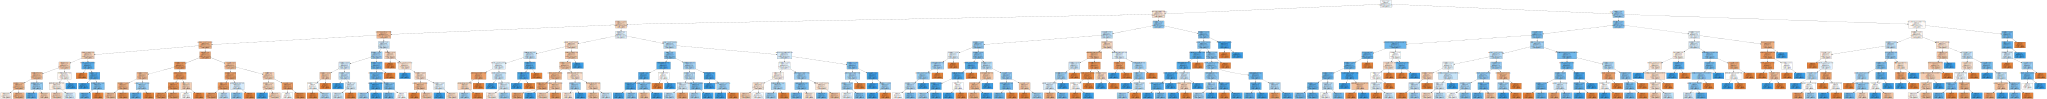

<Figure size 72x360 with 0 Axes>

In [208]:
with open("C:/finalProject/finaltree.dot") as f:
    dot_graph = f.read()
    
plt.figure(figsize=(1, 5))
graphviz.Source(dot_graph)    

In [210]:
dot = graphviz.Source(dot_graph)
dot.format = "png"
dot.render(filename="finaltree",directory="C:/finalProject",cleanup=True)

'C:/finalProject\\finaltree.png'

In [211]:
for name, value in zip(feature_names, dt_clf.feature_importances_):
    print(name, value)
# 각 설명변수의 중요도를 보면 duration -> release_year -> country순으로 중요하다고 볼 수 있다.

type 0.14818072507738106
country 0.0815765587604328
release_year 0.10733845738019498
rating 0.026917900693503437
duration 0.2589726299396456
International TV Shows 0.0024490272938805886
TV Dramas 0.004927684764004516
TV Sci-Fi & Fantasy 0.0
Dramas 0.04665135275113935
International Movies 0.01141048772534615
Horror Movies 0.0024842405805736763
Action & Adventure 0.008348549884321264
Independent Movies 0.008161481396848521
Sci-Fi & Fantasy 0.003637504529146671
TV Mysteries 0.0
Thrillers 0.0026171052230766394
Crime TV Shows 0.00504948722586772
Docuseries 0.002366831932609798
Documentaries 0.09203770858790965
Sports Movies 0.0039107800473845555
Comedies 0.0013809721249940397
Anime Series 0.0
Reality TV 0.013588880418817464
TV Comedies 0.005504059219377302
Romantic Movies 0.004734470437404439
Romantic TV Shows 0.002152925387616975
Science & Nature TV 0.0
Movies 0.0
British TV Shows 0.0019192377160207063
Korean TV Shows 0.0028711824343732296
Music & Musicals 0.010421462930935108
LGBTQ Movies

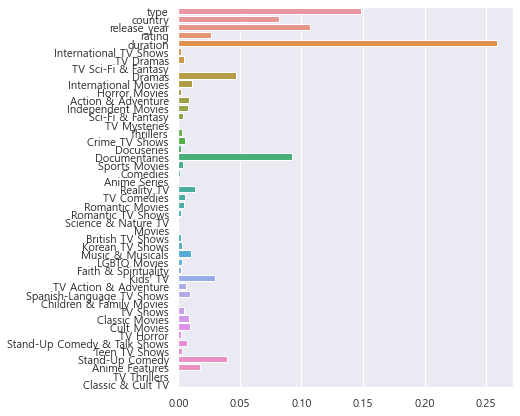

In [212]:
plt.figure(figsize=(6, 7))
sns.barplot(x=dt_clf.feature_importances_, y=feature_names)